In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import random
from sklearn.utils import shuffle

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


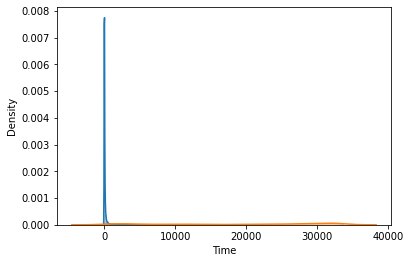

In [29]:
data=pd.read_csv("/content/creditcard.csv")
sns.distplot(data['Amount'])
sns.distplot(data['Time'])

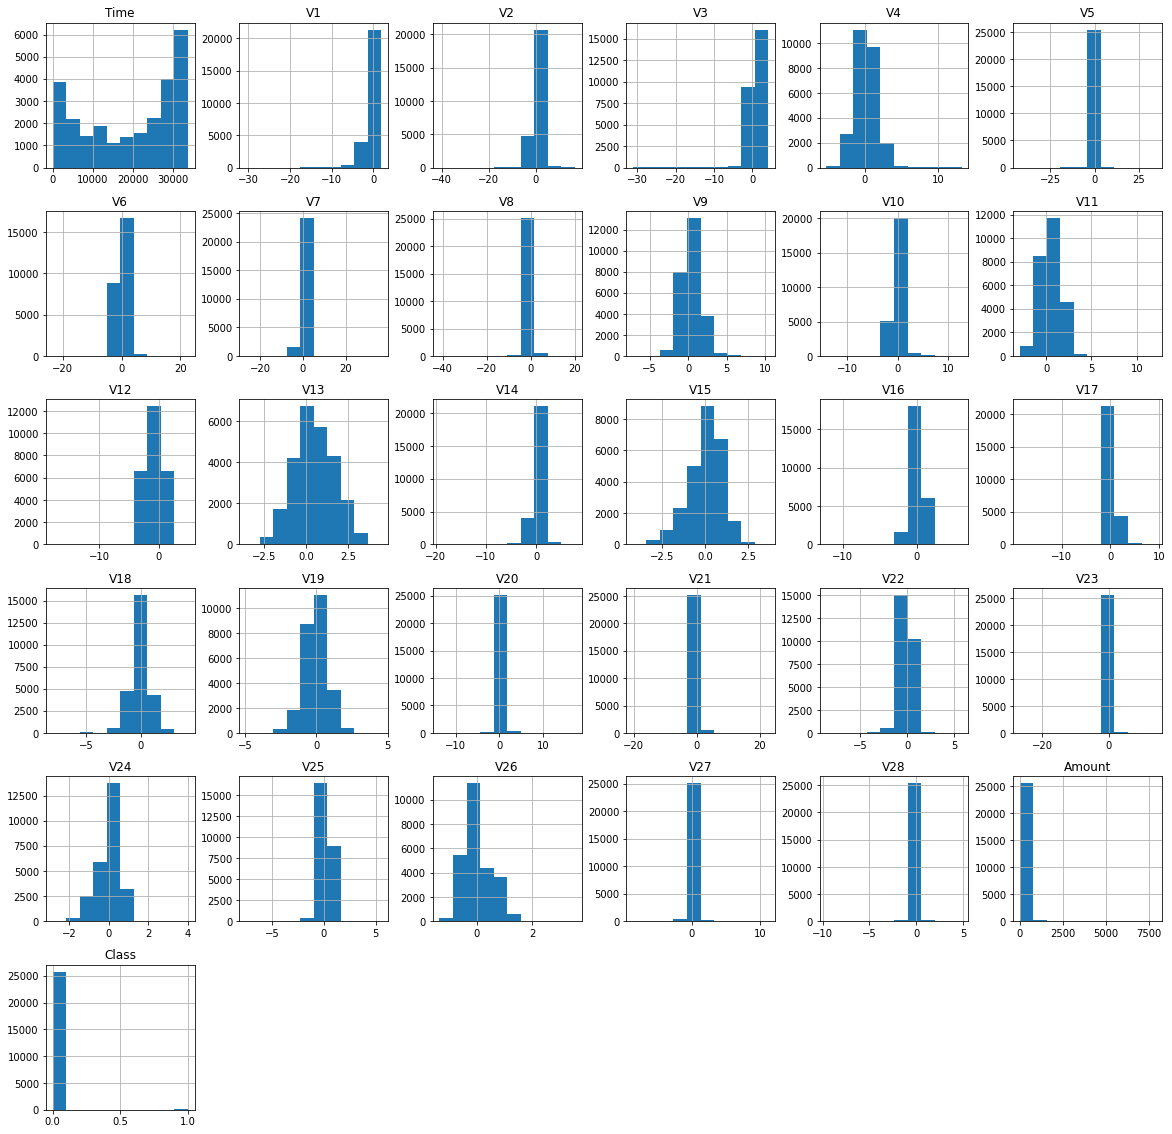

In [30]:
data.hist(figsize=(20,20))
plt.show()

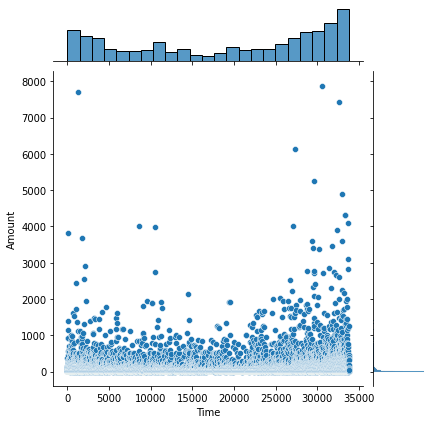

In [31]:
sns.jointplot(x= 'Time', y= 'Amount', data= data)
d=data

In [32]:
class0 = d[d['Class']==0]

len(class0)

25749

In [33]:
class1 = d[d['Class']==1]

len(class1)

88

In [34]:
temp = shuffle(class0)

d1 = temp.iloc[:2000,:]
d1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
12676,22216,1.098872,-0.398163,1.013762,-0.730030,-0.690845,0.499475,-0.891269,0.293036,2.794839,-1.383665,2.707818,-0.753298,1.755895,1.486474,0.311242,-0.877837,0.883907,0.018299,-0.087121,-0.181986,-0.045253,0.389412,0.011048,-0.315725,0.304927,-0.685428,0.096068,0.014407,11.85,0.0
946,718,-0.417881,0.713747,1.119375,-0.163817,0.384231,0.476158,0.415452,0.262647,0.050946,-0.266197,-0.409487,0.178357,-0.561583,-0.073219,-1.214504,0.060320,-0.550866,0.560708,1.059088,0.090697,-0.049727,0.140058,-0.329534,-0.785784,-0.027248,0.418979,0.348954,0.177725,9.99,0.0
18618,29641,1.104307,0.175545,1.404570,2.521112,-0.605631,0.657540,-0.686025,0.349422,-0.082992,0.671013,0.401140,0.592715,-0.277469,-0.179919,-0.947655,0.926674,-0.768720,0.437700,-0.427201,-0.158641,-0.059202,-0.066573,-0.004390,-0.003113,0.301393,-0.039851,0.036612,0.021784,1.00,0.0
21235,31549,-2.280007,-2.982947,1.258201,-1.053761,1.734600,-1.371628,-1.212430,0.335633,-0.874270,0.129967,-0.025315,-0.370039,-0.548082,-0.233486,-1.559388,1.221054,-0.073369,-0.697850,1.027095,0.987612,0.318894,-0.124248,0.616466,-0.539070,0.025835,-0.476772,-0.023442,0.175941,153.95,0.0
7780,10836,1.020913,-0.400279,0.662579,0.341929,-0.656141,-0.021927,-0.386604,0.054592,1.820545,-0.633971,2.304076,-1.324081,1.189417,1.511455,-1.465550,-0.529449,1.042556,-0.416446,0.088721,-0.026048,-0.131286,-0.065529,-0.067101,0.260703,0.253718,1.066000,-0.096361,-0.005774,79.95,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15077,26422,1.099532,0.596789,0.483058,2.784166,-0.037903,0.003320,-0.065695,0.105076,-0.561140,0.216570,1.085436,0.860767,0.135633,-1.197795,-1.526982,0.634469,0.447223,0.418137,-0.497978,-0.100590,-0.083193,-0.060165,-0.117840,0.257504,0.608203,0.059384,0.020404,0.036234,7.58,0.0
15524,26915,1.217660,-0.498712,0.147388,-0.318640,-0.883832,-0.774762,-0.444808,-0.105775,-0.689089,0.048314,0.403465,-0.300349,0.175151,-1.338351,0.273334,0.719521,1.695471,-1.822007,0.167168,0.170062,0.003597,-0.045720,0.008480,0.347066,0.347565,-0.298498,0.030008,0.047937,66.44,0.0
23210,32638,0.218100,-2.804550,0.137514,-0.104345,-1.658424,0.805264,-0.473944,0.126090,0.217342,0.083446,-1.437874,-0.749864,-0.369102,-0.674425,-0.221821,0.798523,0.720268,-1.518571,0.687893,1.201586,0.324319,-0.219820,-0.579231,-0.724638,0.183807,-0.222990,-0.046120,0.114504,599.08,0.0
21071,31445,-1.730770,-1.203527,1.393325,0.649266,0.454163,-1.262364,-0.037015,-0.237585,-1.615505,0.688858,-0.582748,-0.166299,0.712602,0.100408,1.085866,-1.674574,0.027499,1.252233,-0.165856,-0.377074,-0.448883,-0.870157,0.088654,0.355738,-0.228681,-0.509578,0.155654,0.202013,173.25,0.0


In [35]:
frames = [d1, class1]
df_temp = pd.concat(frames)

df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2088 entries, 12676 to 23422
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    2088 non-null   int64  
 1   V1      2088 non-null   float64
 2   V2      2088 non-null   float64
 3   V3      2088 non-null   float64
 4   V4      2088 non-null   float64
 5   V5      2088 non-null   float64
 6   V6      2088 non-null   float64
 7   V7      2088 non-null   float64
 8   V8      2088 non-null   float64
 9   V9      2088 non-null   float64
 10  V10     2088 non-null   float64
 11  V11     2088 non-null   float64
 12  V12     2088 non-null   float64
 13  V13     2088 non-null   float64
 14  V14     2088 non-null   float64
 15  V15     2088 non-null   float64
 16  V16     2088 non-null   float64
 17  V17     2088 non-null   float64
 18  V18     2088 non-null   float64
 19  V19     2088 non-null   float64
 20  V20     2088 non-null   float64
 21  V21     2088 non-null   float64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


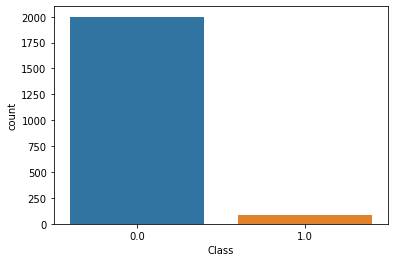

In [36]:
df= shuffle(df_temp)

df.to_csv('creditcardsampling.csv')

sns.countplot('Class', data=df)

In [37]:
"""# SMOTE"""

!pip install --user imblearn

In [38]:
import imblearn

from imblearn.over_sampling import  SMOTE
oversample=SMOTE()
X=df.iloc[ : ,:-1]
Y=df.iloc[: , -1]
X,Y=oversample.fit_resample(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [39]:
X=pd.DataFrame(X)
X.shape


(4000, 30)

In [40]:
Y=pd.DataFrame(Y)
Y.head()

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [41]:
names=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class']


In [42]:
data=pd.concat([X,Y],axis=1)
d=data.values

In [43]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4000 non-null   float64
 1   1       4000 non-null   float64
 2   2       4000 non-null   float64
 3   3       4000 non-null   float64
 4   4       4000 non-null   float64
 5   5       4000 non-null   float64
 6   6       4000 non-null   float64
 7   7       4000 non-null   float64
 8   8       4000 non-null   float64
 9   9       4000 non-null   float64
 10  10      4000 non-null   float64
 11  11      4000 non-null   float64
 12  12      4000 non-null   float64
 13  13      4000 non-null   float64
 14  14      4000 non-null   float64
 15  15      4000 non-null   float64
 16  16      4000 non-null   float64
 17  17      4000 non-null   float64
 18  18      4000 non-null   float64
 19  19      4000 non-null   float64
 20  20      4000 non-null   float64
 21  21      4000 non-null   float64
 22  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


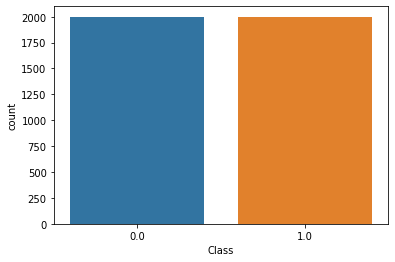

In [44]:
data=pd.DataFrame(d,columns=names)
sns.countplot('Class', data=data)

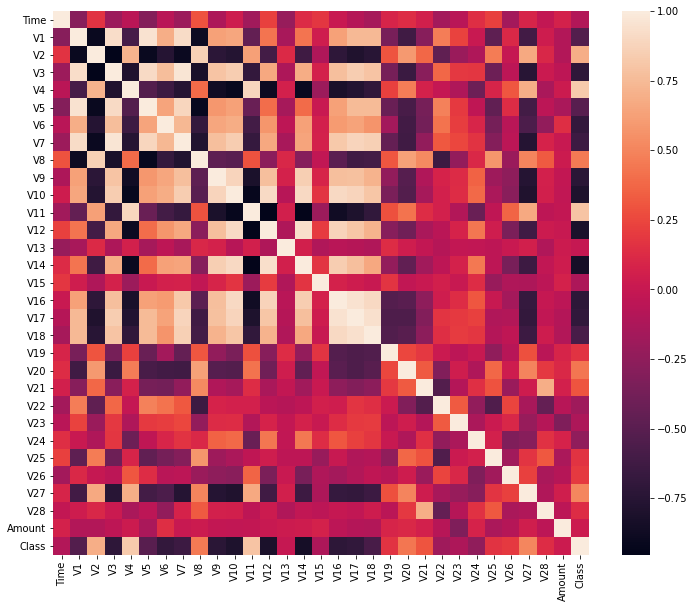

In [45]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr())

In [46]:
import math
import sklearn.preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, precision_recall_curve, f1_score, auc

In [47]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data['Class'], test_size=0.3, random_state=42)

In [48]:
"""# Feature Scaling"""

# cols= ['V22', 'V24', 'V25', 'V26', 'V27', 'V28']

scaler = StandardScaler()
frames= ['Time', 'Amount']
x= data[frames]
d_temp = data.drop(frames, axis=1)
temp_col=scaler.fit_transform(x)


In [49]:
scaled_col = pd.DataFrame(temp_col, columns=frames)
scaled_col.head()


,Time,Amount
0,0.958051,-0.336869
1,1.413280,-0.251459
2,1.405977,-0.340818
3,1.169842,-0.304554
4,1.400816,0.230882


In [50]:
d_scaled = pd.concat([scaled_col, d_temp], axis =1)
d_scaled.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.958051,-0.336869,-0.714289,1.119861,1.116583,0.790555,0.429109,-0.465263,0.578744,0.037913,-0.331003,0.269364,-0.267277,-0.010075,0.005721,0.272304,1.295798,-0.649443,0.081438,-0.363585,0.016780,0.234949,0.106956,0.572292,-0.116823,0.086698,-0.211457,-0.282472,0.534350,0.310544,0.0
1,1.413280,-0.251459,-0.819602,0.644671,2.175939,-0.246323,-0.063440,-0.504867,0.668503,0.092013,-0.099616,-1.023408,-0.213911,0.434009,-0.313116,-0.194709,-0.626652,-0.431955,0.184692,-1.255811,-0.993261,-0.142375,-0.144021,-0.359491,-0.010303,0.607018,-0.072075,0.018891,0.045944,0.096068,0.0
2,1.405977,-0.340818,-0.751319,0.369583,1.483292,-1.519077,0.360417,-0.165744,0.596666,-0.129746,0.636583,0.362212,1.151654,-0.224689,-1.420597,-0.144440,0.337902,0.528177,-0.941291,-0.131350,-0.690212,0.082311,-0.213507,-0.149835,0.070295,-0.314453,-0.325715,0.705221,-0.128450,-0.373449,0.0
3,1.169842,-0.304554,1.178030,-0.193490,0.647505,0.506159,-0.826710,-0.490457,-0.317617,0.071559,0.590084,-0.106928,0.968962,0.730835,-1.151370,0.199041,-0.948603,-0.210051,0.014282,-0.065743,0.538689,-0.162190,-0.042161,0.040192,-0.057163,0.598541,0.447930,0.643865,-0.043767,-0.002830,0.0
4,1.400816,0.230882,-3.123194,-0.877124,2.622195,2.723160,0.529351,-0.025879,0.503734,-0.867859,0.616361,2.037978,-0.578752,-0.943140,-0.495403,-1.293303,0.856775,0.339850,-0.702043,0.154848,0.057449,-1.174482,-0.459773,0.619833,-0.314248,0.460139,0.255066,0.151751,-0.766296,-0.018025,0.0


In [51]:
y = data['Class']
d_scaled.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.958051,-0.336869,-0.714289,1.119861,1.116583,0.790555,0.429109,-0.465263,0.578744,0.037913,-0.331003,0.269364,-0.267277,-0.010075,0.005721,0.272304,1.295798,-0.649443,0.081438,-0.363585,0.016780,0.234949,0.106956,0.572292,-0.116823,0.086698,-0.211457,-0.282472,0.534350,0.310544,0.0
1,1.413280,-0.251459,-0.819602,0.644671,2.175939,-0.246323,-0.063440,-0.504867,0.668503,0.092013,-0.099616,-1.023408,-0.213911,0.434009,-0.313116,-0.194709,-0.626652,-0.431955,0.184692,-1.255811,-0.993261,-0.142375,-0.144021,-0.359491,-0.010303,0.607018,-0.072075,0.018891,0.045944,0.096068,0.0
2,1.405977,-0.340818,-0.751319,0.369583,1.483292,-1.519077,0.360417,-0.165744,0.596666,-0.129746,0.636583,0.362212,1.151654,-0.224689,-1.420597,-0.144440,0.337902,0.528177,-0.941291,-0.131350,-0.690212,0.082311,-0.213507,-0.149835,0.070295,-0.314453,-0.325715,0.705221,-0.128450,-0.373449,0.0
3,1.169842,-0.304554,1.178030,-0.193490,0.647505,0.506159,-0.826710,-0.490457,-0.317617,0.071559,0.590084,-0.106928,0.968962,0.730835,-1.151370,0.199041,-0.948603,-0.210051,0.014282,-0.065743,0.538689,-0.162190,-0.042161,0.040192,-0.057163,0.598541,0.447930,0.643865,-0.043767,-0.002830,0.0
4,1.400816,0.230882,-3.123194,-0.877124,2.622195,2.723160,0.529351,-0.025879,0.503734,-0.867859,0.616361,2.037978,-0.578752,-0.943140,-0.495403,-1.293303,0.856775,0.339850,-0.702043,0.154848,0.057449,-1.174482,-0.459773,0.619833,-0.314248,0.460139,0.255066,0.151751,-0.766296,-0.018025,0.0


In [52]:
"""# Dimensionality Reduction"""

from sklearn.decomposition import PCA

pca = PCA(n_components=11)
X_temp_reduced = pca.fit_transform(d_scaled)
pca.explained_variance_ratio_
pca.explained_variance_

array([362.3499226 ,  61.88144023,   9.70959818,   6.54812355,
         2.63228279,   2.51862852,   2.28372096,   1.82420996,
         1.51948797,   1.19319468,   1.05076327])

In [53]:
names=['Name','Phoneno','Lat','Long','Gender','Transaction Id','Platform','Time','Amount','Bank','Reason']

X_reduced= pd.DataFrame(X_temp_reduced,columns=names)
X_reduced.head()

,Name,Phoneno,Lat,Long,Gender,Transaction Id,Platform,Time,Amount,Bank,Reason
0,-14.023261,-3.299848,-0.655074,0.268443,1.363993,-0.687564,0.403224,-1.064954,-0.671060,0.563636,-0.204712
1,-14.392188,-3.345964,-1.076933,0.010507,1.656910,-0.610154,0.556897,-0.649732,-0.412638,-1.042884,-1.450274
2,-14.534690,-3.175189,-1.404566,-0.094137,1.583017,-0.530141,0.740971,-1.234413,-0.112244,-1.726925,0.466497
3,-14.287943,-3.060220,-0.921863,-0.044235,1.169271,-1.354595,-1.365002,-0.078431,-0.126884,0.313032,0.143008
4,-14.278925,-2.776854,-1.070403,2.130900,1.733861,-0.065609,3.805681,-0.830125,-0.687089,2.029012,-0.490230


In [54]:
Y=d_scaled['Class']

new_data=pd.concat([X_reduced,Y],axis=1)
new_data.head()
new_data.shape

(4000, 12)

In [55]:
new_data.to_csv('finaldata.csv')

In [56]:

X_train, X_test, y_train, y_test= train_test_split(X_reduced, d_scaled['Class'], test_size = 0.30, random_state = 42)

In [57]:
X_train.shape, X_test.shape

((2800, 11), (1200, 11))

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
"""# Support Vector Machine"""

from sklearn.svm import SVC
svc=SVC(kernel='rbf',probability=True)
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)
y_pred_svc

array([0., 1., 0., ..., 0., 0., 1.])

In [60]:
type(X_test)
X_test.to_csv('testing.csv')

In [61]:
from sklearn.model_selection import GridSearchCV
parameters = [ {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 1, 0.01, 0.0001 ,0.001]}]
grid_search = GridSearchCV(estimator = svc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 99.68 %
Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [62]:
svc_param=SVC(kernel='rbf',gamma=0.01,C=100,probability=True)
svc_param.fit(X_train,y_train)

SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [63]:
import pickle
# Saving model to disk

In [64]:
pickle.dump(svc_param, open('cfd_model.pkl','wb'))

In [65]:
model=pickle.load(open('cfd_model.pkl','rb'))


In [68]:
to_predict_list=[-14.02326125,-3.299848286,-0.655073883,0.268443017,1.363993087,-0.687563798,0.40322427,-1.064953755,-0.671059904,0.56363595,-0.2047123]
to_predict = np.array(to_predict_list).reshape(1, 11) 

In [69]:
result=model.predict(to_predict)
result[0]

0.0